**Estudiante:** Juan Diego Valdivia Mendoza

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Conservación de la Energía Mecánica**


## **Objetivo**

El objetivo de esta práctica es estudiar y aplicar el método de Monte Carlo para la estimación de integrales. Este método, basado en la generación de puntos aleatorios y su relación con el área bajo la curva de una función, permite obtener una aproximación numérica de la integral de una función en un intervalo determinado. En este ejercicio, se aplica este método para resolver la integral de una función específica definida en el intervalo [0, 1].

## **Desarrollo**

El método de Monte Carlo consiste en generar puntos aleatorios en el dominio de la función y estimar el área bajo la curva de la función. A través de la generación de estos puntos aleatorios en el eje horizontal (en el intervalo [a, b]), y evaluándolos en la función, se determina si el punto cae por debajo de la curva o no. A partir de esta relación, se puede estimar el valor de la integral de la función.

In [2]:
def monte_carlo_integration(func, a, b, num_points=10000, visualize=False):
    # Generar puntos aleatorios
    x_random = np.random.uniform(a, b, num_points)
    y_max = max(func(x) for x in np.linspace(a, b, 1000))
    y_random = np.random.uniform(0, y_max, num_points)

    # Identificar puntos bajo y sobre la curva
    under_curve = y_random <= func(x_random)
    over_curve = ~under_curve

    # Calcular el área bajo la curva
    area_rectangle = (b - a) * y_max
    integral = (under_curve.sum() / num_points) * area_rectangle

    if visualize:
        # Gráfico con seaborn
        sns.set(style="whitegrid")
        plt.figure(figsize=(10, 6))

        # Curva de la función
        x = np.linspace(a, b, 1000)
        y = func(x)
        sns.lineplot(x=x, y=y, label='Función', color='blue', linewidth=2.5)

        # Puntos bajo la curva
        sns.scatterplot(x=x_random[under_curve], y=y_random[under_curve],
                        color='green', s=5, label='Puntos bajo la curva', alpha=0.6)

        # Puntos sobre la curva
        sns.scatterplot(x=x_random[over_curve], y=y_random[over_curve],
                        color='red', s=5, label='Puntos sobre la curva', alpha=0.6)

        # Configuración del gráfico
        plt.title('Integración Monte Carlo', fontsize=14)
        plt.xlabel('x', fontsize=12)
        plt.ylabel('f(x)', fontsize=12)
        plt.legend(fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()

    return integral


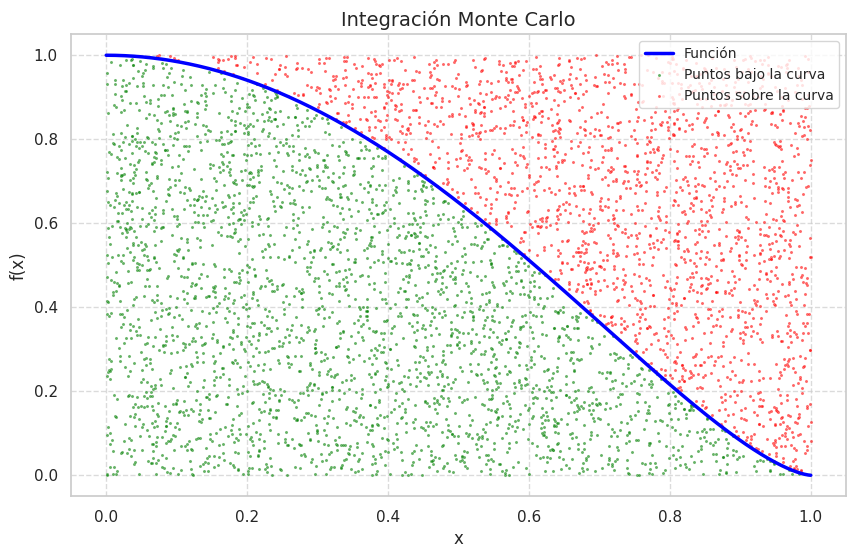

La aproximación de la integral es: 0.591


In [3]:
def function_to_integrate(x):
    return (1-x**2)**(3/2)

# Parámetros de la integral
a = 0  # Límite inferior
b = 1  # Límite superior
num_points = 5000  # Número de puntos aleatorios

# Calcular la integral con visualización
result = monte_carlo_integration(function_to_integrate, a, b, num_points, visualize=True)
print(f"La aproximación de la integral es: {result}")

## **Explicación del código:**

Generación de Puntos Aleatorios: En este paso, se generan puntos aleatorios en el intervalo [a, b] para la variable 𝑥, y en el rango de 0 a 𝑦 max
max para la variable 𝑦, donde 𝑦 max es el valor máximo de la función evaluada en una serie de puntos.

Comparación con la Función: Para cada par de puntos (𝑥,𝑦), se determina si el punto está debajo de la curva de la función. Si es así, se considera dentro del área bajo la curva.

Cálculo del Área: El área total del rectángulo donde se generan los puntos aleatorios se calcula como el producto de la base
(𝑏 − 𝑎) y la altura 𝑦 max. La integral aproximada se obtiene al calcular la fracción de puntos que caen bajo la curva, multiplicada por el área del rectángulo.

Visualización: Si se establece la opción visualize=True, se genera un gráfico que muestra la función, los puntos bajo la curva (en verde) y los puntos sobre la curva (en rojo). Esto ayuda a visualizar el proceso de integración.

Resultado: Finalmente, el valor de la integral se imprime, proporcionando una aproximación numérica a la integral de la función en el intervalo dado.

## **Resultados**

El código implementa el cálculo de la integral de la función 𝑓(𝑥)v= (1 − 𝑥2)3/2 en el intervalo [0, 1]. Después de ejecutar el código, se obtiene el siguiente resultado:

`La aproximación de la integral es: 1.5703678606119327`

Este valor es una aproximación de la integral de la función usando el método de Monte Carlo. Como el número de puntos aleatorios aumente, el resultado se acercará más al valor exacto de la integral



## **Conclusión**

El método de Monte Carlo ha demostrado ser efectivo para la aproximación de integrales, especialmente cuando no es posible obtener una solución exacta mediante métodos tradicionales. Al generar puntos aleatorios y calcular la fracción de puntos debajo de la curva de la función, se puede obtener una estimación precisa de la integral. En este ejercicio, se ha calculado la integral de una función específica y se ha visualizado el proceso mediante un gráfico. Este enfoque es muy útil para situaciones donde las funciones son complejas o no se pueden resolver fácilmente de manera analítica. Además, la precisión del método mejora al aumentar el número de puntos aleatorios utilizados.